In [1]:
%matplotlib inline

import time
import os
import glob
from use_trained_wild_model import ObjectDetection

/home/golden/coding-py36/lib/python3.6/site-packages/tensorflow/models/research/object_detection/utils/visualization_utils.py:27: UserWarning: matplotlib.pyplot as already been imported, this call will have no effect.
  import matplotlib; matplotlib.use('Agg')  # pylint: disable=multiple-statements


In [2]:
#drone input means video is comeing from drone versus cropped animals
drone_input = True

#First frame to process in folder
first_frame = None
#Last frame to process in folder
last_frame = None

animal_type = 'GZ'
video_name = 'observation061'

if drone_input:
    # Directory to save outputs to 
    output_directory = '/media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/processed-videos/raw-footage/'  
    # path to (and including)frozen_inference_graph.pb
    path_to_checkpoint = '/home/golden/Dropbox/kenya-tracking/models/model-sept-1/out_put_inference_graph.pb/frozen_inference_graph.pb' 
    # to label_map.pbtxt
    path_to_labels = '/home/golden/Dropbox/kenya-tracking/models/model-sept-1/kenya_tracking_label_map.pbtxt'  
    tfrecord_folder = '/media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/raw-frames-tfrecords/raw-footage/' + video_name
    
    print(tfrecord_folder)
#     tfrecord_folder = '/media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/raw_frames_tf_records/'
#     tfrecord_clip_list = []
#     for index, walk_list in enumerate(os.walk(tfrecord_folder)):
#         if index == 0:
#             continue
#         tfrecord_clip_list.append({'dirpath': walk_list[0],
#                                     'filenames': walk_list[2]})
#     clip_index = 0
#     tfrecord_list = [os.path.join(tfrecord_clip_list[clip_index]['dirpath'], filename) for filename in tfrecord_clip_list[clip_index]['filenames']]
    tfrecord_list = glob.glob(tfrecord_folder + '/*')
    tfrecord_list.sort()
    print('using ', len(tfrecord_list), 'files')
    print('demo file:', tfrecord_list[0])
    number_of_classes = 5
    record_drone_movement = False
    extract=False
    save_positions = True
    print('Preparing to process images from the drone...')
else:
    # path to (and including)frozen_inference_graph.pb
    path_to_checkpoint = '/home/golden/Projects_desktop/kenya-tracking/models/animals_to_heads/out_put_inference_graph.pb/frozen_inference_graph.pb'
    # to label_map.pbtxt
    path_to_labels = '/home/golden/Projects_desktop/kenya-tracking/models/animals_to_heads/data/label_map.pbtxt' 
    image_dir =  '/media/golden/72FFC6EE48B5CF39/kenya-tracking/raw_frames/test_extract/extracts/'       
    number_of_classes = 1
    video_output_file = '/media/golden/72FFC6EE48B5CF39/kenya-tracking/videos/zebra_mpala.avi'
    position_file = '/media/golden/72FFC6EE48B5CF39/kenya-tracking/head-annotations' 
    position_file = os.path.join(position_file, 'test_extract')
    label_every_n_frames = 1
    record_drone_movement = False
    extract=False
    print('Preparing to process images that are not from the drone...')
    tf_records_list = None

verbose = True




/media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/raw-frames-tfrecords/raw-footage/observation061
using  40 files
demo file: /media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/raw-frames-tfrecords/raw-footage/observation061/train-00000-of-00040
Preparing to process images from the drone...


In [3]:
tracker = ObjectDetection(output_directory, tfrecord_list, path_to_checkpoint, path_to_labels, number_of_classes, verbose,
                          save_positions=save_positions, extract=extract, record_drone_movement=record_drone_movement, 
                          first_frame=first_frame, last_frame=last_frame)


outputs saved at /media/golden/72FFC6EE48B5CF39/drone-tracking/kenya-tracking/processed-videos/raw-footage/observation061


In [4]:
t = time.time()
tracker.track()
print('total_time:', time.time() - t)

extraction begun...
0  images processed
1200  images processed
2400  images processed
3600  images processed
4800  images processed
6000  images processed
7200  images processed
8400  images processed
9600  images processed
10800  images processed
12000  images processed
13200  images processed
14400  images processed
15600  images processed
16800  images processed
18000  images processed
19200  images processed
20400  images processed
21600  images processed
22800  images processed
24000  images processed
25200  images processed
26400  images processed
27600  images processed
28800  images processed
30000  images processed
31200  images processed
32400  images processed
33600  images processed
34800  images processed
36000  images processed
37200  images processed
38400  images processed
39600  images processed
40800  images processed
42000  images processed
43200  images processed
44400  images processed
45600  images processed
46800  images processed
48000  images processed
49200  i

In [6]:
import cv2
import numpy as np
image_file_one = '/media/golden/72FFC6EE48B5CF39/kenya-tracking/raw_frames/NOV08_2017_DJI_0117/NOV08_2017_DJI_0117_6000.jpg'
image_file_two = '/media/golden/72FFC6EE48B5CF39/kenya-tracking/raw_frames/NOV08_2017_DJI_0117/NOV08_2017_DJI_0117_7000.jpg' 
image_one = cv2.imread(image_file_one)
image_two = cv2.imread(image_file_two)
image_one_gray = np.float32(cv2.cvtColor(image_one, cv2.COLOR_BGR2GRAY))
image_two_gray = np.float32(cv2.cvtColor(image_two, cv2.COLOR_BGR2GRAY))

In [7]:
shift, _ = cv2.phaseCorrelate(image_one_gray, image_two_gray)
print('shift:', shift)
shift, _ = cv2.phaseCorrelate(image_two_gray, image_one_gray)
print('shift:', shift)




shift: (-141.41269486261854, 327.0803870319934)
shift: (141.41269486068927, -327.0803870318771)


In [8]:
new_image = np.zeros_like(image_one_gray)
for i in range(new_image.shape[0]):
    for j in range(new_image.shape[1]):
        try:
            new_image[i, j] = image_two_gray[i - int(shift[1]) ,j - int(shift[0])]
        except:
            continue

In [9]:
cv2.imshow('image', new_image/255)
cv2.waitKey(10000)
cv2.destroyAllWindows()

In [10]:
image_two_gray.max()

255.0

In [35]:
cv2.imwrite('/home/golden/Desktop/shift.jpg', new_image)
cv2.imwrite('/home/golden/Desktop/original_1.jpg', image_one_gray)
cv2.imwrite('/home/golden/Desktop/original_2.jpg', image_two_gray)

True

In [7]:
import numpy as np

In [8]:
x = np.ones((3,10,5))

In [9]:
x

array([[[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.]],

       [[ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1.,  1.,  1.,  1.],
        [ 1.,  1

In [1]:
x = {}

In [2]:
print(bool(x))

False


In [3]:
x['top'] = 3

In [4]:
print(bool(x))

True


In [5]:
bool(x['top'])

True

In [8]:
bool('top' in x)

True

In [8]:
import numpy as np
x = np.ones((5,12))

In [9]:
v = np.zeros((7,12))

In [10]:
new_array = np.vstack((x,v))

In [11]:
new_array

array([[ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

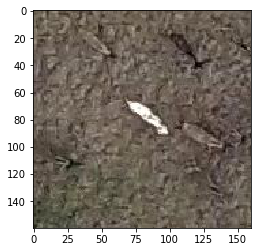

In [6]:
import matplotlib.pyplot as plt
import numpy as np
image = plt.imread('/media/golden/72FFC6EE48B5CF39/drone_tracking/other-tracking/raw_frames/DJI_0002/DJI_0002_20.jpg')
image = plt.imread('/media/golden/72FFC6EE48B5CF39/drone_tracking/kenya-tracking/processed_videos/DJI_0002/extracts/DJI_0002_1808/zebra/DJI_0002_1808.zebra.4.full.jpg')
plt.imshow(image)

In [3]:
image_mean = np.mean(image)
image_std_div = np.std(image)
print('mean:', image_mean)
print('std:', image_std_div)
print('min', image.min())
print('max', image.max())

mean: 95.0669331517
std: 16.2498875494
min 0
max 255


In [24]:
image_norm = (image - image_mean) * 1.5 + image_mean
print('max', image_norm.max())
image_norm = image_norm / 255
image_norm = np.where(image_norm < 0, 0, image_norm)
print('max', image_norm.min())

max 334.966533424
max 0.0


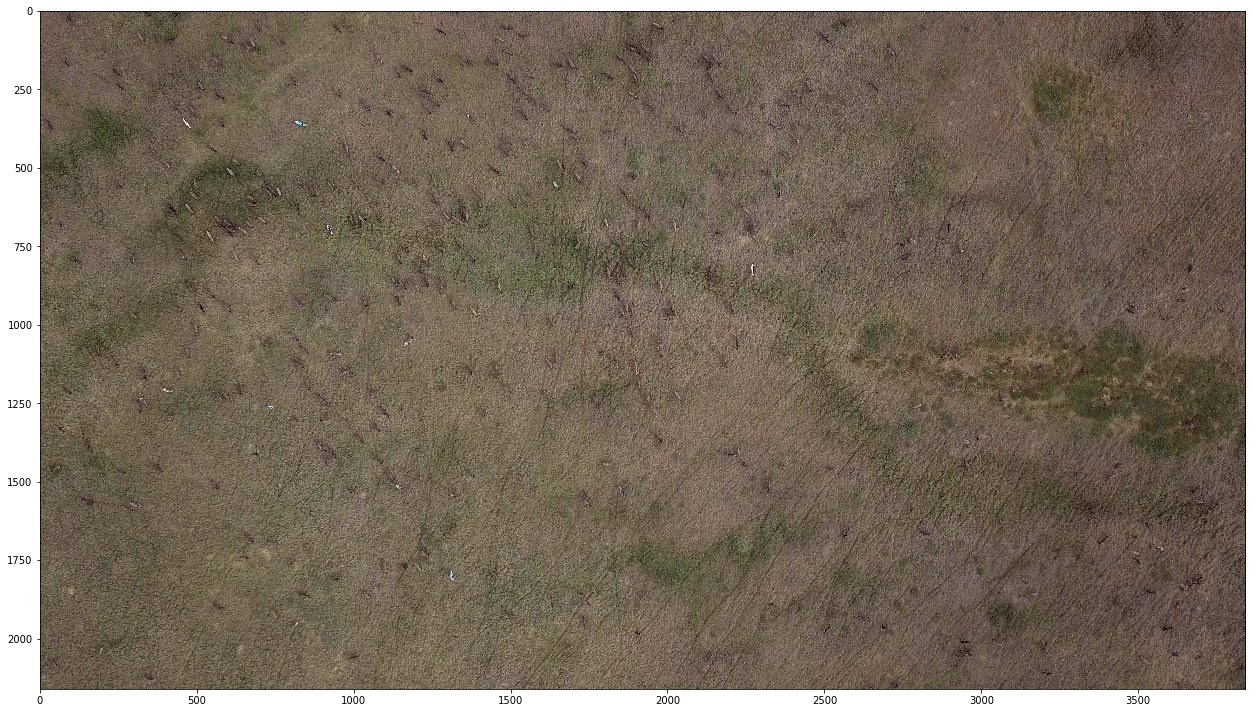

In [25]:
size_scale = .01
plt.figure(figsize=(image.shape[0]*size_scale, image.shape[1]*size_scale))
plt.imshow(image_norm)
